In [2]:
import pandas as pd

### 2021년 서울 월별 교통사고 데이터

In [3]:
seoul_ac = pd.read_excel('./minidata/21서울월별교통사고.xls')
seoul_ac = seoul_ac.rename(columns = seoul_ac.iloc[0])

In [4]:
seoul_ac = seoul_ac.loc[[1,4]]
seoul_ac = seoul_ac.drop(['시군구','사고년도'], axis=1)
seoul_ac

,시도,합계,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월
1,합계,4035,290,241,282,362,347,383,422,368,342,356,290,352
4,서울,4035,290,241,282,362,347,383,422,368,342,356,290,352


In [5]:
seoul_ac = seoul_ac.set_index(['시도'])

In [6]:
seoul_ac = seoul_ac.drop('합계')

In [7]:
seoul_ac = seoul_ac.drop(['합계'], axis=1)
seoul_ac

,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월
시도,,,,,,,,,,,,
서울,290,241,282,362,347,383,422,368,342,356,290,352


In [8]:
seoul_ac = seoul_ac.T
seoul_ac

시도,서울
01월,290
02월,241
03월,282
04월,362
05월,347
06월,383
07월,422
08월,368
09월,342
10월,356


In [9]:
seoul_ac = seoul_ac.reset_index(drop=True)
seoul_ac = seoul_ac.rename(columns = {'서울' : '사고건수'})
seoul_ac

시도,사고건수
0,290
1,241
2,282
3,362
4,347
5,383
6,422
7,368
8,342
9,356


### 2021 서울 월별 강수량 데이터

In [10]:
seoul_w = pd.read_csv('./minidata/21서울월별강수량.csv', encoding='euc-kr', skiprows = 12)
seoul_w = seoul_w.drop(['\t지점번호','Unnamed: 8'], axis=1)
seoul_w

,지점명,일시,강수량(mm),일최다강수량(mm),일최다강수량일자,1시간최다강수량(mm),1시간최다강수량일자
0,서울,2021-01,18.9,9.2,2021-01-21,NaN,NaN
1,서울,2021-02,7.1,3.4,2021-02-03,NaN,NaN
2,서울,2021-03,110.9,67.5,2021-03-01,NaN,NaN
3,서울,2021-04,124.1,56.2,2021-04-03,11.5,2021-04-03
4,서울,2021-05,183.1,66.9,2021-05-16,11.3,2021-05-30
5,서울,2021-06,104.6,38.2,2021-06-27,37.7,2021-06-27
6,서울,2021-07,168.3,67.4,2021-07-19,65.7,2021-07-19
7,서울,2021-08,211.2,77.4,2021-08-31,27.9,2021-08-21
8,서울,2021-09,131.0,68.1,2021-09-21,27.1,2021-09-21
9,서울,2021-10,57.0,14.2,2021-10-10,12.7,2021-10-01


In [11]:
seoul = pd.concat([seoul_w, seoul_ac], axis=1)
seoul

,지점명,일시,강수량(mm),일최다강수량(mm),일최다강수량일자,1시간최다강수량(mm),1시간최다강수량일자,사고건수
0,서울,2021-01,18.9,9.2,2021-01-21,NaN,NaN,290
1,서울,2021-02,7.1,3.4,2021-02-03,NaN,NaN,241
2,서울,2021-03,110.9,67.5,2021-03-01,NaN,NaN,282
3,서울,2021-04,124.1,56.2,2021-04-03,11.5,2021-04-03,362
4,서울,2021-05,183.1,66.9,2021-05-16,11.3,2021-05-30,347
5,서울,2021-06,104.6,38.2,2021-06-27,37.7,2021-06-27,383
6,서울,2021-07,168.3,67.4,2021-07-19,65.7,2021-07-19,422
7,서울,2021-08,211.2,77.4,2021-08-31,27.9,2021-08-21,368
8,서울,2021-09,131.0,68.1,2021-09-21,27.1,2021-09-21,342
9,서울,2021-10,57.0,14.2,2021-10-10,12.7,2021-10-01,356


In [12]:
seoul = seoul[['일시','강수량(mm)','사고건수']]

In [13]:
seoul

,일시,강수량(mm),사고건수
0,2021-01,18.9,290
1,2021-02,7.1,241
2,2021-03,110.9,282
3,2021-04,124.1,362
4,2021-05,183.1,347
5,2021-06,104.6,383
6,2021-07,168.3,422
7,2021-08,211.2,368
8,2021-09,131.0,342
9,2021-10,57.0,356


In [27]:
seoul['사고건수'] = seoul['사고건수'].astype(int)

C:\Users\admin\AppData\Local\Temp\ipykernel_14544\3923190359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul['사고건수'] = seoul['사고건수'].astype(int)


In [28]:
seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   일시       12 non-null     object 
 1   강수량(mm)  12 non-null     float64
 2   사고건수     12 non-null     int32  
dtypes: float64(1), int32(1), object(1)
memory usage: 368.0+ bytes


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

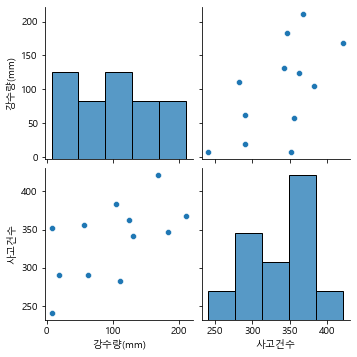

In [17]:
plt.rc('font', family = 'Malgun Gothic', size = 10)
sns.pairplot(seoul)

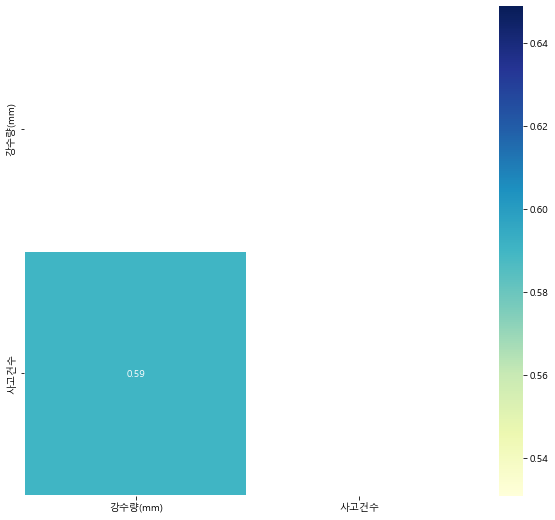

In [77]:
fig, ax = plt.subplots(1,1, figsize=(10,9))

mask = np.zeros_like(seoul.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(seoul.corr(), annot=True, cmap='YlGnBu', linewidth=0.1, mask=mask)
plt.show()

In [61]:
s = seoul[['강수량(mm)','사고건수']]
s= s.rename(columns={'강수량(mm)':'강수량'})
s

,강수량,사고건수
0,18.9,290
1,7.1,241
2,110.9,282
3,124.1,362
4,183.1,347
5,104.6,383
6,168.3,422
7,211.2,368
8,131.0,342
9,57.0,356


### 그래프 그리기

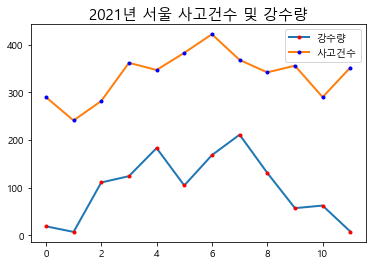

In [57]:
plt.rc('font', family = 'Malgun Gothic', size = 10)
plt.plot(s['강수량'],marker='o', ls='-',  
         lw=2, ms=2, mec='r',mew=2, mfc='r', label='강수량')

plt.plot(s['사고건수'],marker='o', ls='-',  
         lw=2, ms=2, mec='b',mew=2, mfc='b', label='사고건수')
plt.title('2021년 서울 사고건수 및 강수량', fontsize=15)

plt.legend()

### 검정

In [19]:
import scipy.stats as stats

In [23]:
# 2021년 서울 강수량과 이륜차교통사고 검정
result = stats.ttest_rel(seoul['강수량(mm)'], seoul['사고건수'])
print('검정 결과 =', result)
print('검정 통계량 = %.3f, p-value = %.3f' %(result))

검정 결과 = Ttest_relResult(statistic=-14.50293336477923, pvalue=1.624078355537696e-08)
검정 통계량 = -14.503, p-value = 0.000


### 단순회귀(사용x)

In [25]:
# 단순선형회귀분석

In [29]:
seoul.corr()

,강수량(mm),사고건수
강수량(mm),1.000000,0.589795
사고건수,0.589795,1.000000


In [59]:
### 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')

In [62]:
print(len(s), "\n", s.head(3), '\n', s.describe())

12 
      강수량  사고건수
0   18.9   290
1    7.1   241
2  110.9   282 
               강수량        사고건수
count   12.000000   12.000000
mean    98.875000  336.250000
std     69.121318   50.713321
min      7.100000  241.000000
25%     47.475000  290.000000
50%    107.750000  349.500000
75%    140.325000  363.500000
max    211.200000  422.000000


In [64]:
print(s.corr())

           강수량      사고건수
강수량   1.000000  0.589795
사고건수  0.589795  1.000000


In [63]:
# 모델 생성에 사용할 라이브러리 불러들이기
import statsmodels.formula.api as smf

In [69]:
### 모델 객체 생성 및 학습모델 생성하기

# 만족도와 상관관계가 높은 적절성 데이터를 사용하여
#  - 종속변수(y) = 사고건수 사용
#  - 독립변수(x) = 강수량 사용
formulas = "사고건수 ~ 강수량"

### 학습모델 생성하기
model = smf.ols(formula = formulas, data=s).fit()
print("model = \n", model)
print("---------------------------")

### 학습모델 결과 확인하기 : summary()
print("학습모델 결과 = \n", model.summary())
print("-------------------------------")

# print("지수값을 실수값으로 표현 : 7.29e-15 = {:.9f}".format(7.29e-15))
# print("-------------------------------")

# - R-squared : 결정계수(1에 까가울 수록 학습모델이 좋은 것임)
#   (결정계수는 예측을 얼마나 잘 할 수 있을까로 해설할 수도 있다.)
# - Adj. R-squared : 수정결정계수(1에 까가울 수록 학습모델이 좋은 것임) : 0.588
# - *** 독립변수가 많을 경우 R-squared과 Adj. R-squared의 차이가 클 경우 
#       독립변수 [이상치를 확인]해야한다. ***

# - 적절성의 p-value : 0.000 < 0.05 => 모델은 유효하다.
# - 적절성의 std err(표준 오차) : 0.038
# - 적절성의 Intercept(y절편) : 0.7789
# - 적정성의 coef(기울기) : 0.7393
# - 적정성의 Kurtosis : 4.012 => 일반적으로 3보다 클경우,
#   평균에 데이터가 몰려있다고 판단한다.
#   kurtosis() 첨도는 확률분포에서 분포의 [뾰족한 정도]를 나타내는 [척도]입니다. 
#   --> 첨도가 높은 경우: 데이터의 분포가 평균(혹은 중심)에 많이 몰려 있어 뾰족하다


### 위 학습결과(summary())의 내용의 데이터 추출해 보기.....

# y절편(b)과 기울기(a) 산출
# 회귀식 y = a * x + b
b, a = model.params
print("y절편(b) = {} / 기울기(a) = {}".format(b, a)) 
print("-------------------------------")

### 결정계수(R-squared)
rsquared = model.rsquared
print("결정계수(R-squared) = ", rsquared) 
print("-------------------------------")

# ### 유의수준(p-value)
# print("유의수준(p-value) = {:.3f}".format(model.pvalues[0]))

# ### (해석)
# # - 생성한 학습모델에 사용된 독립변수는
# # - 유의수준 p-value는 0.000 < 0.05 으로 유의미 하다.
# # - 결정계수(R-squared) 0.588 > 0.05  => 의미있는 학습모델
# # - 하지만, 예측 시에 정확도가 다소 낮을 수 있다.

model = 
---------------------------
학습모델 결과 = 
                             OLS Regression Results                            
Dep. Variable:                   사고건수   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     5.334
Date:                Wed, 27 Jul 2022   Prob (F-statistic):             0.0435
Time:                        10:14:28   Log-Likelihood:                -61.054
No. Observations:                  12   AIC:                             126.1
Df Residuals:                      10   BIC:                             127.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Int

C:\Users\admin\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### 다항회귀분석(사용x)

In [70]:
### 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')

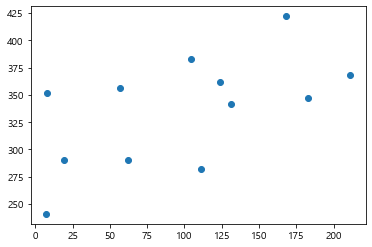

In [71]:
### 데이터 생성하기

x = np.array(s['강수량'])
y = np.array(s['사고건수'])

# 산점도 시각화
plt.scatter(x, y) 
plt.show()

### 산점도가 직선을 띄지않고 곡선을 띄고 있다.

In [72]:
### 독립변수(x) 데이터를 메트릭스 형태로 변형하기
#    - 향후 다항회귀로 변환시 차원 확대를 위해서..

from sklearn.linear_model import LinearRegression

# np.newaxis : 입력을 matrix로 변환
x = x[:, np.newaxis] 
print("x = \n", x)
print("-------------------------------")

x = 
 [[ 18.9]
 [  7.1]
 [110.9]
 [124.1]
 [183.1]
 [104.6]
 [168.3]
 [211.2]
 [131. ]
 [ 57. ]
 [ 62.4]
 [  7.9]]
-------------------------------


예측(테스트) 결과 =  [301.6428591  296.53671015 341.45351196 347.1654752  372.69621997
 338.72734769 366.29189755 384.85577807 350.15127416 318.12966208
 320.46637431 296.88288974]


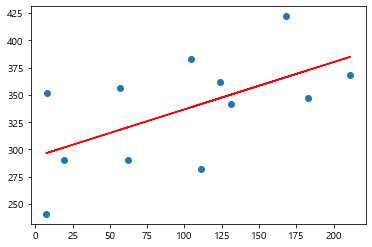

In [73]:
### 선형회귀 모델 생성하기

# 선형회귀 학습모델 생성하기
model = LinearRegression().fit(x, y) 

# 예측(테스트) 하기
y_pred = model.predict(x)
print("예측(테스트) 결과 = ", y_pred)
# [2.  2.7 3.4 4.1 4.8]

### 산점도 시각화
plt.scatter(x, y) 

### 추세선 그래프 그리기
plt.plot(x, y_pred, c='red') 
plt.show()

In [75]:
### 다항식 특징을 추가하기

from sklearn.preprocessing import PolynomialFeatures

# PolynomialFeatures() : 2차항 적용을 위한 함수 
#  - degree : 열 개수, 
#  - include_bias : 편향 (false = 고려안함)
#  - 편향이란?
#    : 예측값이 정답과 얼마나 다른가(차이가 있는가, 떨어져 있는가, 
#       멀게 있는가 등등) 를 표현한 것
poly = PolynomialFeatures(degree=3, include_bias = False) 
print("poly = ", poly)

### 특징 행렬 생성하기 : 다항으로 변환하기
#  - fit_transform() : 독립변수(x)의 데이터를 2차항으로 변형
x2 = poly.fit_transform(x) 
print("x2= \n", x2)

poly =  PolynomialFeatures(degree=3, include_bias=False)
x2= 
 [[1.89000000e+01 3.57210000e+02 6.75126900e+03]
 [7.10000000e+00 5.04100000e+01 3.57911000e+02]
 [1.10900000e+02 1.22988100e+04 1.36393803e+06]
 [1.24100000e+02 1.54008100e+04 1.91124052e+06]
 [1.83100000e+02 3.35256100e+04 6.13853919e+06]
 [1.04600000e+02 1.09411600e+04 1.14444534e+06]
 [1.68300000e+02 2.83248900e+04 4.76707899e+06]
 [2.11200000e+02 4.46054400e+04 9.42066893e+06]
 [1.31000000e+02 1.71610000e+04 2.24809100e+06]
 [5.70000000e+01 3.24900000e+03 1.85193000e+05]
 [6.24000000e+01 3.89376000e+03 2.42970624e+05]
 [7.90000000e+00 6.24100000e+01 4.93039000e+02]]


model = 
 LinearRegression()
---------------------------
기울기 =  [ 5.72891346e-02  6.09254157e-03 -2.21699041e-05]
-------------------------------
y절편 =  295.0165517307728
-------------------------------
예측값(y_pred2) = 
 [298.12595816 295.72249475 346.06255264 353.5841894  373.6715396
 342.29622399 371.54319884 370.02118756 357.23557236 313.97098892
 316.92765297 295.83844079]
-------------------------------
실제값(y) = 
 [290 241 282 362 347 383 422 368 342 356 290 352]
-------------------------------
결정계수(R-squared) =  0.36263054582461385
-------------------------------


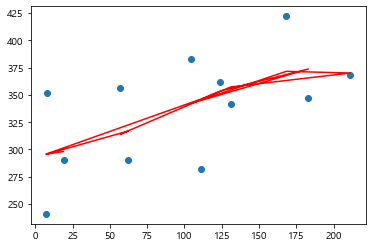

In [76]:
### 다항으로 변환된 독립변수(x2)의 값 사용을 위한 
### 선형회귀 모델 생성하기

# 선형회귀분석에서 결정계수 확인을 위한 라이브러리
from sklearn.metrics import r2_score

# 선형회귀 학습모델 생성 : 다항 독립변수(x2)를 사용
model2 = LinearRegression().fit(x2, y) 

print("model = \n", model2)
print("---------------------------")

# 기울기 
print("기울기 = ", model2.coef_)   
print("-------------------------------")

# y절편
print("y절편 = ", model2.intercept_) 
print("-------------------------------")

# 예측(테스트) 하기..
y_pred2 = model2.predict(x2)

### 결과 확인해 보기
print("예측값(y_pred2) = \n", y_pred2)
print("-------------------------------")

print("실제값(y) = \n", y)
print("-------------------------------")

# 결정계수(R-squared)
print("결정계수(R-squared) = ", r2_score(y, y_pred2))   
print("-------------------------------")

### 다항 회귀 시각화 하기
# 산점도 표시
plt.scatter(x, y)

# 다항회귀모델 예측결과 값을 이용한 추세선 그래프
plt.plot(x, y_pred2, c='red') 
plt.show()

### (해석)
# - 실제 독립변수(x)의 곡선의 분포에 맞게
# - 다항회귀분석 예측 결과 추세선이 잘 그려졌음
# - 결정계수(R-squared)의 값이 [0.994]로 
#   예측 결과가 매우 정확한 모델로 확인됨